Utilizando Técnica Não Supervisionada - Clusterização

In [ ]:
# Importa bibliotecas
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
 

# import required libraries for clustering

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from collections import Counter


    Objetivo: Criar uma segmentação de países utilizando os recordes femininos da modalidade esportiva de corridas. Para o desenvolvimento do modelo foi utilizada uma base disponível no site da universidade de Wisconsin através do endereço: http://www.stat.wisc.edu/~rich/JWMULT06dat/T1-9.dat.
    Nesta base temos os recordes femininos internacionais, referência 2005, das seguintes modalidades: 100 metros em segundos, 200 metros em segundos, 400 metros em segundos, 800 metros em minutos, 1.500 metros em minutos, 3.000 metros em minutos e maratona em minutos. 
    Vamos iniciar a análise seguindo as etapas de mineração de dados. Tendo como foco a segmentação de países a partir dos resultados nas provas de corrida.  Vale ressaltar que não temos uma variável target, queremos obter agrupamentos de países com características homogêneas. A técnica vai nos ajudar, a realizar esses agrupamentos, apontando a quantidade de grupos e quais as características de cada grupo. 
    Primeiramente fizemos o download dos dados salvando em um diretório. É o nosso primeiro contato com essa base de análise, então precisamos nos familiarizar com o conteúdo dela. 
    Aqui a base foi renomeada para “Base_Paises”. 


In [ ]:
# Ler arquivo csv - lendo o conjunto de dados usando a função read_csv() dos Pandas.

dados = pd.read_csv("Base_Paises.csv", sep=";")

print("Total number of transactions: "+ str(dados.shape[0]))
dados.head(5)


In [ ]:
# número de observações faltantes no dataset para cada variável
dados.isnull().sum()

In [ ]:
#Estatisticas descritivas
dados.describe()

In [ ]:
#Verificando o formato das variaveis
dados.info()

In [ ]:
print(dados)

In [ ]:
# avaliando a distribuicaoo de cada variavel

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = dados['p100ms'].hist(bins=20)
fig.set_xlabel('p100ms')
fig.set_ylabel('Número de casos')


plt.subplot(4, 2, 2)
fig = dados['p200ms'].hist(bins=20)
fig.set_xlabel('p200ms')
fig.set_ylabel('Número de casos')


plt.subplot(4, 2, 3)
fig = dados['p400ms'].hist(bins=20)
fig.set_xlabel('p400ms')
fig.set_ylabel('Número de casos')



plt.subplot(4, 2, 4)
fig = dados['p800mm'].hist(bins=20)
fig.set_xlabel('p800mm')
fig.set_ylabel('Número de casos')


plt.subplot(4, 2, 5)
fig = dados['p1500mm'].hist(bins=20)
fig.set_xlabel('p1500mm')
fig.set_ylabel('Número de casos')

plt.subplot(4, 2, 6)
fig = dados['p3000mm'].hist(bins=20)
fig.set_xlabel('p3000mm')
fig.set_ylabel('Número de casos')

plt.subplot(4, 2, 7)
fig = dados['pmaratm'].hist(bins=20)
fig.set_xlabel('pmaratm')
fig.set_ylabel('Número de casos')



In [ ]:
# draw boxplots to visualize outliers

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = dados.boxplot(column='p100ms')
fig.set_title('')
fig.set_ylabel('p100ms')


plt.subplot(4, 2, 2)
fig = dados.boxplot(column='p200ms')
fig.set_title('')
fig.set_ylabel('p200ms')


plt.subplot(4, 2, 3)
fig = dados.boxplot(column='p400ms')
fig.set_title('')
fig.set_ylabel('p400ms')

plt.subplot(4, 2, 4)
fig = dados.boxplot(column='p800mm')
fig.set_title('')
fig.set_ylabel('p800mm')

plt.subplot(4, 2, 5)
fig = dados.boxplot(column='p1500mm')
fig.set_title('')
fig.set_ylabel('p1500mm')

plt.subplot(4, 2, 6)
fig = dados.boxplot(column='p3000mm')
fig.set_title('')
fig.set_ylabel('p3000mm')


plt.subplot(4, 2, 7)
fig = dados.boxplot(column='pmaratm')
fig.set_title('')
fig.set_ylabel('pmaratm')


In [ ]:
# Excluindo outliers e selecionando somente as variáveis segmentadoras

aux = dados[dados['pmaratm'] < 180]

dados_semout = aux.drop(['PAIS'], axis=1)

dados_semout.describe()



In [ ]:
dados_semout.corr()


In [ ]:
correlation = dados_semout.corr()
plt.figure(figsize=(10,10))
sb.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

In [ ]:
print(dados_semout)

In [ ]:
# Análise exploratória dos dados
#sb.pairplot()
sb.pairplot(dados_semout)

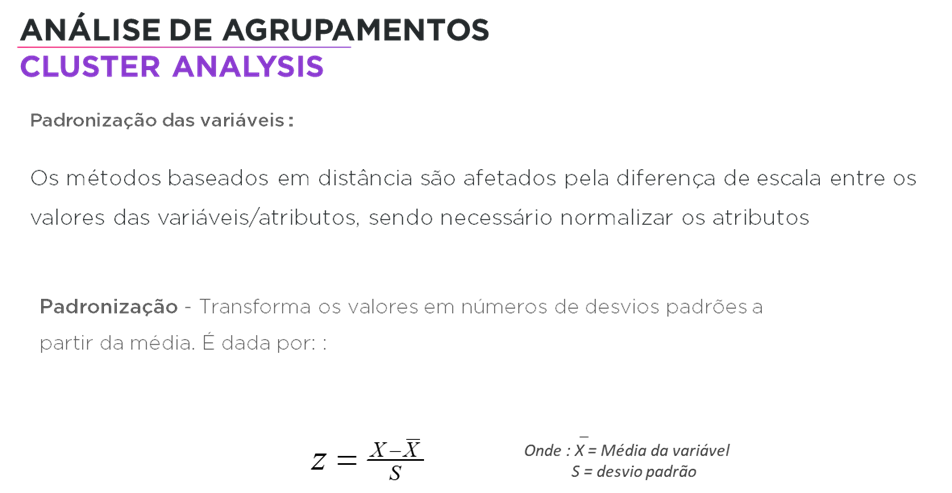

In [ ]:
# feature Scaling
cols = dados_semout.columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(dados_semout)

dados_scaled = scaler.transform(dados_semout)

dados_scaled = pd.DataFrame(dados_scaled, columns=[cols])

dados_scaled.describe().round(2)

In [ ]:
print(dados_scaled)

####     Tem que se tomar cuidado ao usar clusterização com dados que não foram padronizados. 
    Isto porque o K-means é muito sensível à escala dos dados porque utiliza a Distância Euclidiana para medir a distância. Por isso, sempre é importante aplicar o Scaling antes de usar o K-means. Outra desvantagem é que o K-Means pode ser bem lento com grande número de observações. Por isso, em alguns casos, utiliza-se uma amostra dos dados e não o conjunto inteiro por questões de performance. Clusterização pode ter resultado ruim se os dados tiverrem ruídos (overlapping) ou outliers. Um grande número de clusters (K) pode diminuir os erros, mas também pode ter maior risco de overfitting.

    Como vantagem, a clusterização não precisa de dados previamente classificados.





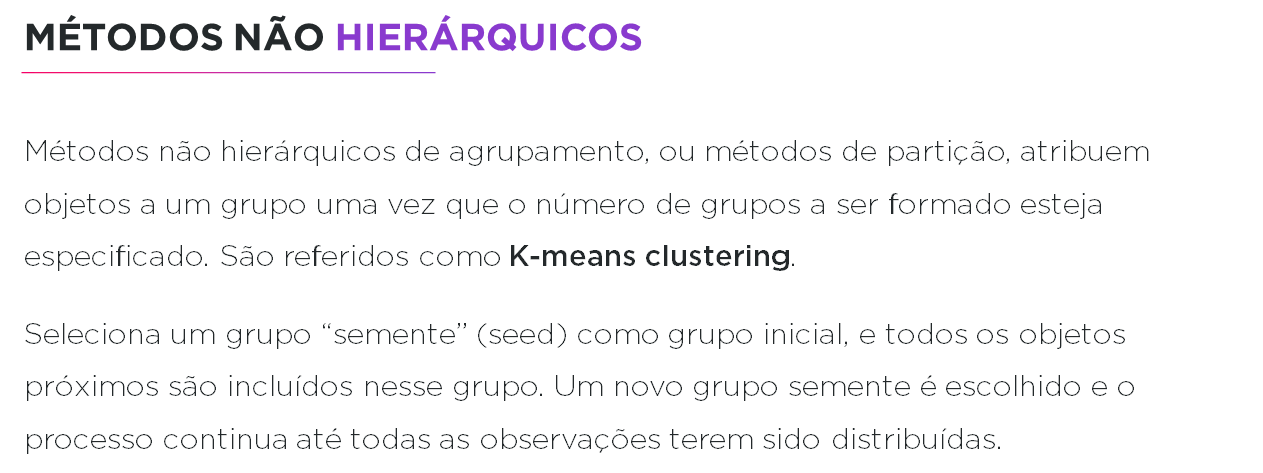

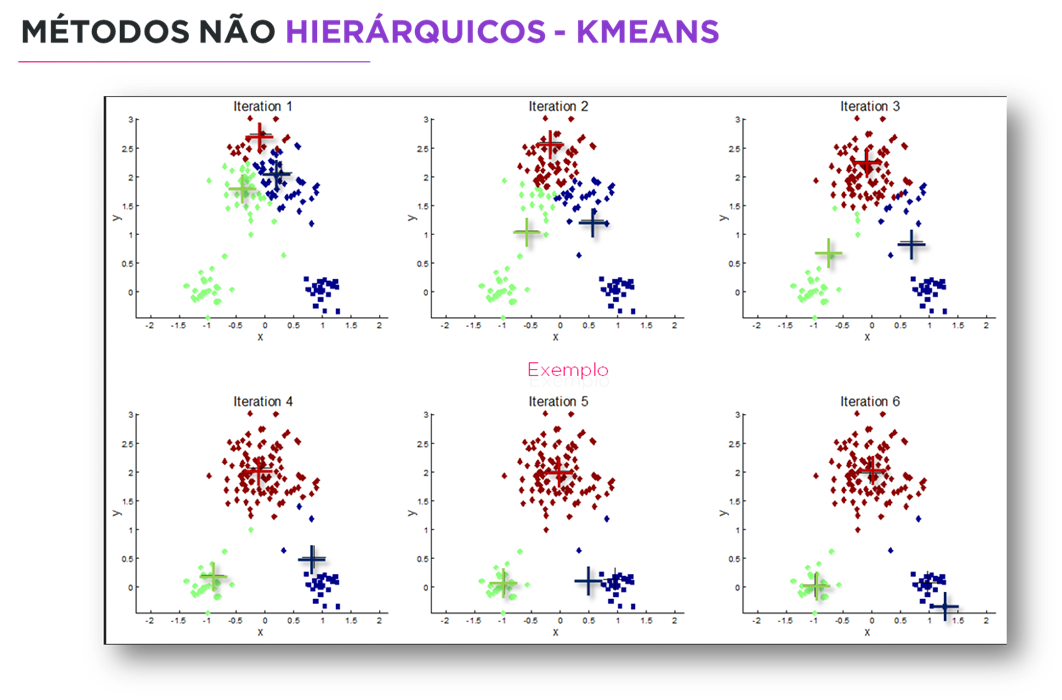

#### Como descobrir o número ideal de clusters?
    Um bom cluster tem uma baixa inertia_ (SSE) e também o menor número de clusters. Não queremos muitos clusters. A Curva de Cotovelo ou Método Elbow Curve é uma técnica usada para encontrar a quantidade ideal de clusters K. Este método testa a variância dos dados em relação ao número de clusters. O valor ideal de K é aquele que tem um menor Within Sum of Squares (WSS) e ao mesmo tempo o menor número de clusters. Chamamos de curva de cotovelo, porque a partir do ponto que seria o “cotovelo” não existe uma discrepância tão significativa em termos de variância. Dessa forma, a melhor quantidade de clusters K seria exatamente onde o cotovelo estaria.
    O método Elbow se trata de uma técnica interessante para encontrar o valor ideal do parâmetro k.

    Basicamente o que o método faz é testar a variância dos dados em relação ao número de clusters.

    É considerado um valor ideal de k quando o aumento no número de clusters não representa um valor significativo de ganho.

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

from sklearn.cluster import KMeans

 
#opção 

wcss = []

for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(dados_scaled)
    wcss.append(kmeans.inertia_)
    
# Mostra o Gráfico
plt.plot(range(1, 12), wcss)
plt.title('O Metodo Elbow - Curva de Cotovelo')
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

# No código acima plotamos o somatório da variância dos dados em relação ao número de clusters
# para conseguir verificar até que ponto com o aumento do número de clusters não existe ganho.

# É sempre bom lembrar que a escolha do parâmetro K é de extrema importância para a tarefa de agrupamento 
# e deve ser corretamente alinhado com as regras do negócio ou problema que esteja resolvendo

#### Silhueta
A silhueta é uma medida do quanto observações mais similares estão próximas entre si e, ao mesmo tempo, o quanto estão distantes de outros clusters diferentes. Busca maior coesão dentro do cluster e maior separação entre clusters. A silhueta vai de -1 a 1, onde o maior valor indica que a observação se encaixou mais dentro do cluster e se distanciou dos outros clusters. Se a silhueta for negativa, a configuração do cluster pode ter ou clusters de mais ou clusters de menos. A silhueta também usa a distância euclidiana para medir a distância entre as observações.
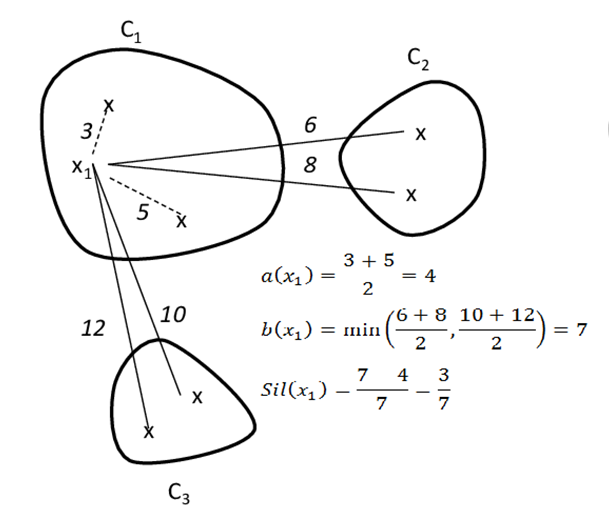

In [ ]:
# Silhueta
from sklearn.metrics import silhouette_samples, silhouette_score

for i in range(2, 11):
    clusterer = KMeans(n_clusters=i)
    preds = clusterer.fit_predict(dados_scaled)
    score = silhouette_score(dados_scaled, preds)
    print('Silhueta para ' + str(i) + ' clusters : ' + str(score))

In [ ]:
dados_scaled.head()

In [ ]:
# k-means with some arbitrary k
# utilizar o método de inicialização random. Selecionar os centroides de forma aleatória.

# Modelo_Kmeans = KMeans(n_clusters = 4, n_init = 10, random_state = 0 ,init = 'random'  )

Modelo_Kmeans = KMeans(n_clusters = 5, n_init = 10, random_state = 0   )
Modelo_Kmeans


In [ ]:
Segmentos = Modelo_Kmeans.fit(dados_scaled)
Segmentos


In [ ]:
Segmentos.cluster_centers_

In [ ]:
#A tabela de distâncias é criada de forma que em cada instância contém os valores de distância em relação a cada cluster.
distance = Modelo_Kmeans.fit_transform(dados_scaled)
distance

# Observe que cada instância contém quatro valores, e cada valor

# corresponde exatamente a distância entre a observaçãoe cada um dos quatro clusters.

# Verifique a coluna que apresenta a menor distância, significa o cluster que ele está mais próximo

In [ ]:
# visualizando o atributo labels_ que nos retorna os labels para cada observação, ou seja,
# o código do cluster que para observação foi atribuído.
labels = Modelo_Kmeans.labels_
labels


# Só lembrando que a numeração dos clusters inicializa a partir do zero, com isso,
# podemos perceber que a primeira coluna da tabela corresponde aos valores de distâncias para o cluster 0, e assim por diante


In [ ]:
dados_scaled.info()


In [ ]:
clusters = Modelo_Kmeans.fit_predict(dados_scaled)

In [ ]:
from collections import Counter

Counter(clusters.tolist())


In [ ]:
# assign the label

dados_semout['Cluster_Id'] = labels
dados_semout.head(54)

# A numeração dos clusters inicializa a partir do zero, com isso, podemos perceber que a primeira coluna da tabela 
# corresponde aos valores de distâncias para o cluster 0,assim por diante


In [ ]:
dados_scaled.info()

In [ ]:
# Box plot to visualize Cluster Id vs Frequency
# Transforma classe em categorica
dados_semout['Cluster_Id'] = dados_semout['Cluster_Id'].astype('string')

In [ ]:
 # Variáveis segmentadoras  com a variável clusters
import matplotlib.pyplot as plt  
sb.boxplot(x='Cluster_Id', y='p100ms', data=dados_semout)
plt.title('Distribuição variaveis segmentadoras por clusters')
plt.show()

In [ ]:
# Variáveis segmentadoras  com a variável clusters
import matplotlib.pyplot as plt  
sb.boxplot(x='Cluster_Id', y='p200ms', data=dados_semout)
plt.title('Distribuição variaveis segmentadoras por clusters')
plt.show()

In [ ]:
# Variáveis segmentadoras  com a variável clusters
import matplotlib.pyplot as plt  
sb.boxplot(x='Cluster_Id', y='p400ms', data=dados_semout)
plt.title('Distribuição variaveis segmentadoras por clusters')
plt.show()

In [ ]:
# Variáveis segmentadoras  com a variável clusters
import matplotlib.pyplot as plt  
sb.boxplot(x='Cluster_Id', y='p1500mm', data=dados_semout)
plt.title('Distribuição variaveis segmentadoras por clusters')
plt.show()

In [ ]:
# Variáveis segmentadoras  com a variável clusters
import matplotlib.pyplot as plt  
sb.boxplot(x='Cluster_Id', y='p3000mm', data=dados_semout)
plt.title('Distribuição variaveis segmentadoras por clusters')
plt.show()

In [ ]:
# Variáveis segmentadoras  com a variável clusters
import matplotlib.pyplot as plt  
sb.boxplot(x='Cluster_Id', y='pmaratm', data=dados_semout)
plt.title('Distribuição variaveis segmentadoras por clusters')
plt.show()

In [ ]:
# Box plot to visualize Cluster Id vs Frequency
dados_scaled.info()

Com o nosso modelo já criado podemos usar o algoritmo K-means para agrupar novos dados baseado nos centroides que já estão definidos.

O processo é extremamente simples..

neste caso, o que será feito é o cálculo de distância entre os novos dados e os centroides de nosso modelo, qual centroide apresentar a menor distância, será o cluster escolhido.

Não precisamos fazer estes cálculos a Scikit-Learn nos fornece essa funcionalidade através do método predict().

Vamos passar novos valores e observar os clusters que serão atribuídos.

In [ ]:
data = [
        [ 11.57, 22.94, 52.50, 2.05, 4.25, 9.19,150.32],  [ 11.4, 22.6, 33.7, 1.8, 2.2, 7.7, 120.5]
    ]

data1 = scaler.transform(data)


In [ ]:
casos_cluster=Modelo_Kmeans.predict(data1)
 
print(casos_cluster)

In [ ]:
dados_scaled.info()

Hierarchical Clustering Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering,

Divisive Agglomerative.

Single Linkage:

In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two closest points.

In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


# Single linkage: 

mergings = linkage(dados_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

Complete Linkage

In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two furthest points.

In [ ]:
# Complete linkage

mergings = linkage(dados_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

Average Linkage:

In average linkage hierarchical clustering, the distance between two clusters is defined as the average distance between each point in one cluster to every point in the other cluster. For example, the distance between clusters “r” and “s” to the left is equal to the average length each arrow between connecting the points of one cluster to the other.
 
 
 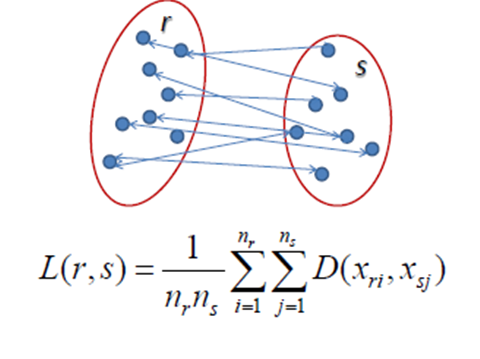

In [ ]:
# Average linkage

mergings = linkage(dados_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

In [ ]:
# Cutting the Dendrogram based on K

# 4 clusters
cluster_labels = cut_tree(mergings, n_clusters=5).reshape(-1, )
cluster_labels

In [ ]:
# Assign cluster labels

dados_semout['cluster_labels'] = cluster_labels


In [ ]:
dados_semout.info()

In [ ]:
print(dados_semout)

In [ ]:
# Tabela cruzada entre os dois métodos hierárquico e não Hierarquico